In [1]:
import tensorflow as tf
import findspark

In [2]:
print(tf.__version__)

2.8.0


In [ ]:
print(findspark.find())
findspark.init()

In [118]:
from pyspark.sql import SparkSession

In [117]:
spark = SparkSession.builder \
                    .master("local") \
                    .appName("CNN") \
                    .getOrCreate()

NameError: name 'SparkSession' is not defined

In [50]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
print('Image Inventory')
print('----------')
print('Training: {}'.format(len(x_train)))
print('Testing:  {}'.format(len(x_test)))
print('----------')

Image Inventory
----------
Training: 60000
Testing:  10000
----------


In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

-----------------
5


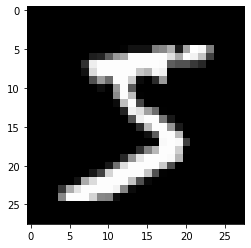

-----------------
0


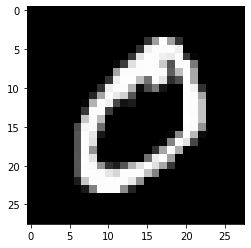

In [6]:
for i in range(2):
    image = x_train[i]
    image = np.array(image, dtype='float')
    label = y_train[i]
    pixels = image.reshape((28, 28))
    plt.imshow(pixels, cmap='gray')
    print('-----------------')
    print(label)
    plt.show()
    

In [7]:
from matplotlib import image
for i in range(1,10):
    png = x_train[i]
    png = np.array(png, dtype='float')
    pixels = png.reshape((28, 28))
    image.imsave('image_no_{}.png'.format(i), pixels, cmap = 'gray')

In [8]:
print(os.listdir())

['derby.log', 'Fire_Department_Calls_for_Service.csv', 'image_no_1.png', 'image_no_2.png', 'image_no_3.png', 'image_no_4.png', 'image_no_5.png', 'image_no_6.png', 'image_no_7.png', 'image_no_8.png', 'image_no_9.png', 'MNIST with CNN.ipynb', 'Predicting Fire Department Calls with Spark ML.ipynb']


In [78]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

In [51]:
x_train = x_train.reshape(60000, 28,28,1)
x_test = x_test.reshape(10000, 28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

60000 train samples
10000 test samples


In [52]:
print(y_train[0].shape)

(10,)


In [53]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(5, 5), input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('sigmoid'))


In [54]:
model.compile(optimizer='adam',loss='categorical_crossentropy', 
              metrics=['accuracy'])


In [55]:
model.fit(x_train,y_train,batch_size=512,
          epochs=5,
          validation_data=(x_test, y_test))

Epoch 1/5
118/118 [==============================] - 20s 163ms/step - loss: 0.2794 - accuracy: 0.9209 - val_loss: 0.0968 - val_accuracy: 0.9726
Epoch 2/5
118/118 [==============================] - 20s 167ms/step - loss: 0.0771 - accuracy: 0.9778 - val_loss: 0.0671 - val_accuracy: 0.9793
Epoch 3/5
118/118 [==============================] - 19s 162ms/step - loss: 0.0507 - accuracy: 0.9851 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 4/5
118/118 [==============================] - 19s 161ms/step - loss: 0.0355 - accuracy: 0.9892 - val_loss: 0.0515 - val_accuracy: 0.9823
Epoch 5/5
118/118 [==============================] - 20s 172ms/step - loss: 0.0269 - accuracy: 0.9918 - val_loss: 0.0511 - val_accuracy: 0.9837


In [57]:
stats = model.evaluate(x_test, y_test)
print('The accuracy rate is {}%'.format(round(stats[1],3)*100))
print('The loss rate is {}%'.format(round(stats[0],2)*100))

313/313 [==============================] - 2s 7ms/step - loss: 0.0511 - accuracy: 0.9837
The accuracy rate is 98.4%
The loss rate is 5.0%


In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 activation_6 (Activation)   (None, 24, 24, 32)        0         
                                                                 
 flatten_2 (Flatten)         (None, 18432)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2359424   
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
 activation_8 (Activation)   (None, 10)               

In [75]:
filters, biases = model.layers[0].get_weights()

f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

(5, 5, 1, 32)


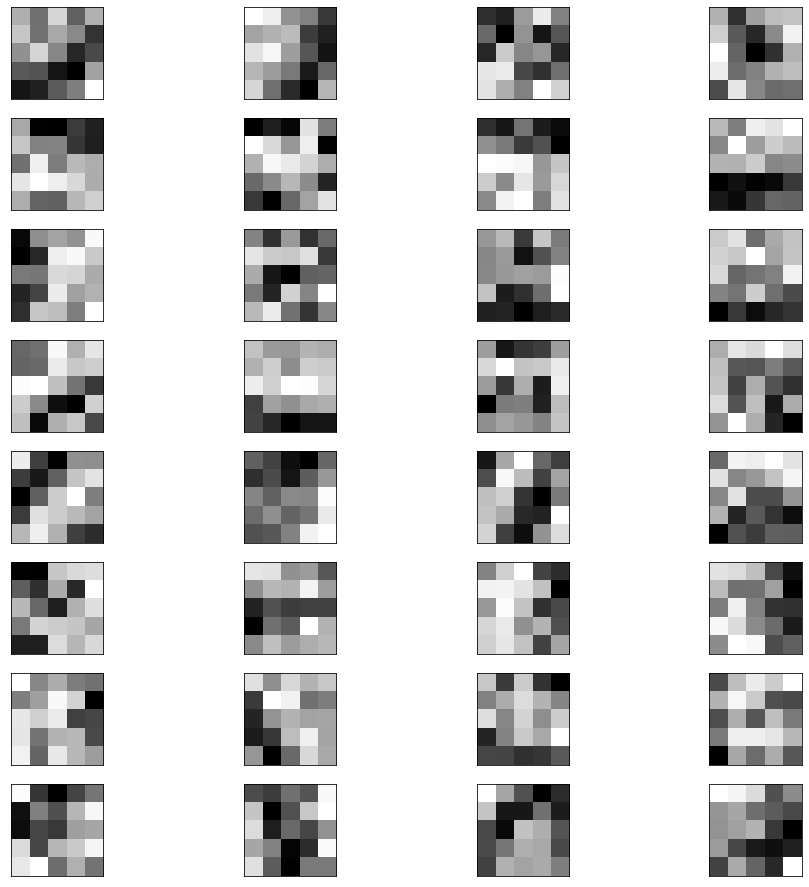

In [73]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	
	# specify subplot and turn of axis
	ax = plt.subplot(8, 4, ix)
	ax.set_xticks([])
	ax.set_yticks([])
	# plot filter channel in grayscale
	plt.imshow(f[:, :], cmap='gray')
	ix = ix + 1
# show the figure
plt.show()

In [113]:
feature_model = Model(inputs=model.inputs, outputs=model.layers[1].output)

In [114]:
feature_maps = feature_model.predict(x_test[125:126])
print((feature_maps.shape))

(1, 24, 24, 32)


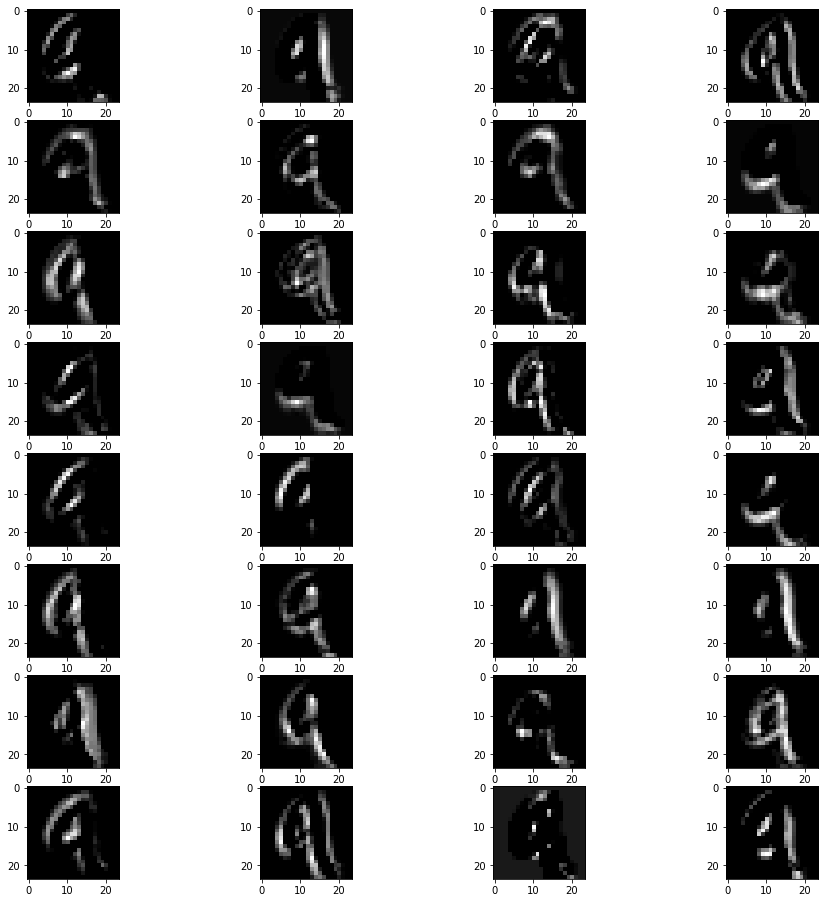

In [115]:
plt.figure(figsize=(16, 16)) 
ix = 1
for i in range(32):
     ax = plt.subplot(8, 4, ix)
	#ax.set_xticks([])
	#ax.set_yticks([])
     plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
     ix += 1
plt.show()

In [116]:
y_test[125:126]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
spark.stop()